In [2]:
import numpy as np
from sklearn.decomposition import FastICA as ICA
import matplotlib.pyplot as plt
import math
import random

In [3]:
def generateData(slopes, samples, deviation, l, u):
    X = []
    Y = []
    data = []
    for index in range(len(slopes)):
        for i in range(samples):
            x = random.uniform(l, u)
            y = slopes[index] * x + random.uniform(-deviation, deviation)
            X.append(x)
            Y.append(y)
            data.append([x, y])
    return np.array(X), np.array(Y), np.array(data)

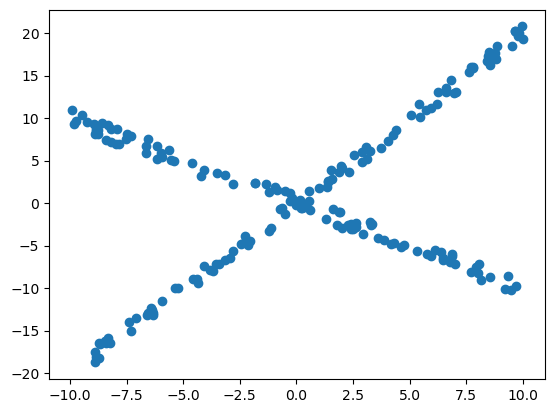

In [4]:
X, Y, data = generateData(np.array([-1, 2]), 100, 1, -10, 10)
plt.scatter(X, Y)

In [5]:
def abline(slope, intercept=0):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [6]:
ica = ICA(tol=1e-5, max_iter=1000, algorithm='deflation')
S = ica.fit(data)
S.components_

/Users/charlie/anaconda3/envs/Pytorch/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


array([[-0.0031908 ,  0.00784508],
       [-0.01207905,  0.00070497]])

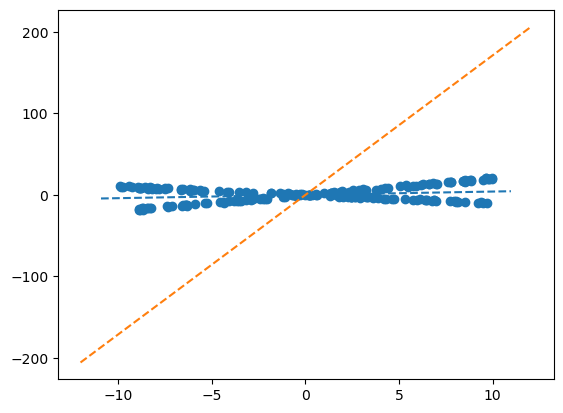

In [7]:
plt.scatter(X, Y)
abline(-S.components_[0][0] / S.components_[0][1])
abline(-S.components_[1][0] / S.components_[1][1])